In [3]:
#!pip3 install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 54.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 7.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma:

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import ISLP

In [13]:
ads = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col=0)
print(ads.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [17]:
#1.1 regression table
X = ads[['TV', 'radio', 'newspaper']]
y = ads['sales']
X = sm.add_constant(X)
lm1 = sm.OLS(y, X).fit() #fitting the OLS model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        12:59:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# 1.2 

Null Hypothesis (H0): The coefficient for TV is equal to zero (𝛽𝑇𝑉 =0

Interpretation: This means that there is no linear relationship between TV advertising expenditures and sales.It is not a signifiacnt predictor in predicting sales. However since the p value <0.05 we reject the nulll hypothesis


Null Hypothesis (H0): The coefficient for radio is equal to zero (𝛽radio =0)

Interpretation: This means that there is no linear relationship between radio advertising expenditures and sales.It is not a significant predictor in predicting sales. However since the p value <0.05 we reject the nulll hypothesis


Null Hypothesis (H0): The coefficient for TV is equal to zero (𝛽𝑇𝑉 =0

Interpretation: This means that there is no linear relationship between newspaper advertising expenditures and sales.It is not a significant predictor in predicting sales. However since the p value >0.05 , we fail to reject the null hypothesis.


# 1.3
Null hypothesis (H0) = βtv = βradio = βnews = 0 ; (H1) = Atleast one of them is not zero
###### The null hypothesis assumes there is no linear relationship between the predictors and the outcome variable sales, but we can see that the adverstising channel- TV and radio have a significant relationship, ie changing the amount spent on radio and tv adverstising changes the sales. This is because the p-value <0.05 so we reject the null hypothesis




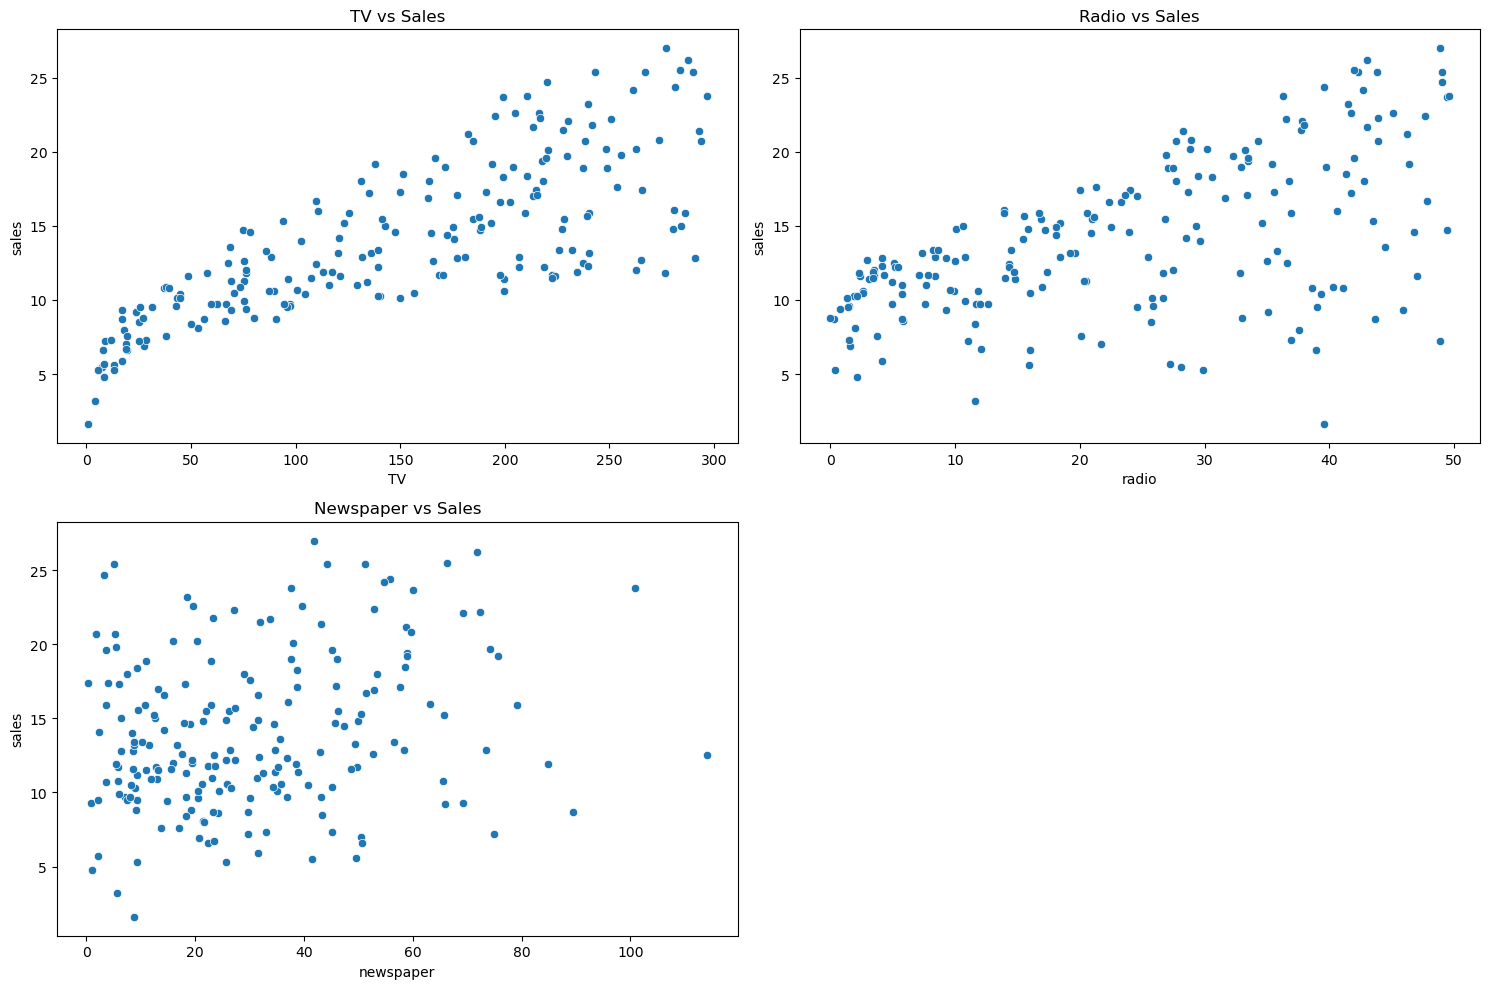

In [26]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x=ads['TV'], y=ads['sales'])
plt.title('TV vs Sales')

# Plot 2: Relationship between Radio and Sales
plt.subplot(2, 2, 2)
sns.scatterplot(x=ads['radio'], y=ads['sales'])
plt.title('Radio vs Sales')

# Plot 3: Relationship between Newspaper and Sales
plt.subplot(2, 2, 3)
sns.scatterplot(x=ads['newspaper'], y=ads['sales'])
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

# 2 

KNN - K nearest neighbours is a non parametric,supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. kNN is also called a lazy learning algorithm. 

for KNN classifier - A distance metric (e.g., Euclidean distance) is used to measure the proximity between points in the feature space. for a given test point, the distances are calculated and then sorted according to distance and clustered basis on the 'k' value given. A class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented around a given data point is used. 

for KNN regression- output variable is continuous rather than categorical. Instead of voting for a class label, KNN regression predicts the value of a continuous target based on the k nearest neighbors. The predicted value is calculated as the average of the values of k nearest neighbors.


| Aspect                  | KNN Classifier                               | KNN Regression                                |
|-------------------------|---------------------------------------------|----------------------------------------------|
| **Output Type**         | Categorical (class labels)                  | Continuous (numeric values)                  |
| **Prediction Method**   | Majority voting among the nearest neighbors  | Average (or weighted average) of neighbors' values |
| **Use Case**            | Used for classification tasks (e.g., spam detection, image classification) | Used for regression tasks (e.g., predicting house prices) |
| **Performance Metrics**  | Accuracy, F1 score, confusion matrix        | Mean Squared Error (MSE), R-squared         |
| **Complexity**          | Potentially higher with many classes        | Typically more straightforward for continuous output |


# 3
## 3.a
for linear model Y = b0 + b1x + e
for cubic model Y = b0 + b1x + b2x^2 + b3x^3 + e
a linear modle is a special case for cubic modle and the cubic model always fits more flexibily than the linear model
In such a case RSS can never increase as R2 keeps increasing as we add parameters. It maybe that the model is capturing some of the noise,in which case RSS can also decrease. Ina ny case it will be rqual or less than the linear model.

## 3.b
As the cubic model is overfitting and capturing noise this will lead to poor generalisation and higher RSS compared to linear model. The bias is low but variance is high compared to linear model. 

## 3.c 
The answer would be similar to part a. Again RSS would les sor equal since we dont know how far from linear the relatiosnhip is or its true functional form. 

## 3.d 
When the true relationship is nonlinear, a cubic regression model typically achieves a lower test residual sum of squares than a linear model. This is because the cubic model can better capture the underlying nonlinear patterns, leading to improved generalization on unseen data compared to the simpler linear regression.




In [32]:
#4 data generation- 
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [34]:
#4.1 model fitting - y onto x
lm2 = sm.OLS(y, x, hasconst=False).fit()

beta_hat = lm2.params[0]  # Coefficient estimate
se = lm2.bse[0]  # Standard error
t = lm2.tvalues[0]  # t-statistic
p = lm2.pvalues[0]  # p-value

print(f"β: {beta_hat:.4f}")
print(f"SE: {se:.4f}")
print(f"t-stat: {t:.4f}")
print(f"p-val: {p:.4f}")

β: 1.9762
SE: 0.1169
t-stat: 16.8984
p-val: 0.0000


In [38]:
#4.2 model fitting - x onto y
lm3 = sm.OLS(x, y, hasconst=False).fit()

beta_hat_1 = lm3.params[0]  # Coefficient estimate
se_1 = lm3.bse[0]  # Standard error
t_1= lm3.tvalues[0]  # t-statistic
p_1= lm3.pvalues[0]  # p-value

print(f"β: {beta_hat_1:.4f}")
print(f"SE: {se_1:.4f}")
print(f"t-stat: {t_1:.4f}")
print(f"p-val: {p_1:.4f}")

β: 0.3757
SE: 0.0222
t-stat: 16.8984
p-val: 0.0000


#### 4.3
t and p val are same , Beta is inverse. this is because first we were modelling how much change in x changes y and now we are modelling how much change in y changes x. also the error unexplained by the predictor variable changes when the predictor variable is different. t stat is beta_hat/se and is symetric thus same.  

In [47]:
#4.d appended at the end -numerical calculation - 
n = len(x)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x ** 2)
sum_y2 = np.sum(y ** 2)

numerator = (np.sqrt(n - 1)) * sum_xy
denominator = np.sqrt(sum_x2 * sum_y2 - sum_xy ** 2)
t_stat_formula = numerator / denominator

print(f"t-statistic (formula): {t_stat_formula:.4f}")
print(f"t-statistic (model): {t:.4f}")

t-statistic (formula): 16.8984
t-statistic (model): 16.8984


In [53]:
#4.e appended at the end seperately - 

# 4.f 
X = sm.add_constant(x)
Y = sm.add_constant(y)

# Regression 1: y on x with intercept
m1 = sm.OLS(y, X).fit()
beta1 = m1.params[1] 
t_stat1 = m1.tvalues[1]
p_value1 = m1.pvalues[1]

# Regression 2: x on y with intercept
m2 = sm.OLS(x, Y).fit()
beta2 = m2.params[1] 
t_stat2 = m2.tvalues[1]
p_value2 = m2.pvalues[1]

print("Regression of y on x with intercept:")
print(f"(β̂): {beta1:.4f}")
print(f"t-stat: {t_stat1:.4f}")
print(f"p-val: {p_value1:.4e}\n")

print("Regression of x on y with intercept:")
print(f"(β̂): {beta2:.4f}")
print(f"t-stat: {t_stat2:.4f}")
print(f"p-val: {p_value2:.4e}")

Regression of y on x with intercept:
(β̂): 1.9686
t-stat: 16.7341
p-val: 1.7388e-30

Regression of x on y with intercept:
(β̂): 0.3763
t-stat: 16.7341
p-val: 1.7388e-30
